In [36]:
import scipy.io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from skimage import io, color, filters, feature, restoration
from skimage.transform import resize, rotate
from skimage.color import rgb2gray
from sklearn.cluster import KMeans
from collections import Counter

import matplotlib.pyplot as plt 
import numpy as np
import matplotlib
import os, sys

In [37]:
mat = scipy.io.loadmat('../data/sat-6-full.mat')

In [38]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train_x', 'test_x', 'train_y', 'test_y', 'annotations'])

In [39]:
x_train = mat.get('train_x')
y_train = mat.get('train_y')
x_test = mat.get('test_x')
y_test = mat.get('test_y')
ann = mat.get('annotations')
ann

array([[array(['100000'], dtype='<U6'), array(['building'], dtype='<U8')],
       [array(['010000'], dtype='<U6'),
        array(['barren land'], dtype='<U11')],
       [array(['001000'], dtype='<U6'), array(['trees'], dtype='<U5')],
       [array(['000100'], dtype='<U6'),
        array(['grassland'], dtype='<U9')],
       [array(['000010'], dtype='<U6'), array(['road'], dtype='<U4')],
       [array(['000001'], dtype='<U6'), array(['water'], dtype='<U5')]],
      dtype=object)

In [40]:
y_train.shape

(6, 324000)

In [41]:
x_train_play = x_train[:,:,:,0:2000]
y_train_play = y_train[:,0:2000]
x_test_play = x_test[:,:0:,0:2000]
y_test_play = y_test[:,0:2000]

In [42]:
y_test_play.T

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0]], dtype=uint8)

In [43]:
# for i in range(test):
#     data = train_x_play[:,:,:,i]
#     img = Image.fromarray(data, 'RGBA')
#     img.save("../data/train_x/img{}.png".format(i))

# def create_classifier_list(y_array):
#     '''
#     Creates a list of classes for each corresponding image in the X population:
#     0 = building
#     1 = barren land
#     2 = trees
#     3 = grassland
#     4 = road
#     5 = water
#     '''
    
i = 0
class_list = []
while i < len(y_train_play[1]):
    class_cat = np.where(y_train_play[:,i]==1)
    class_list.append(int(class_cat[0]))
    i+=1

class_list

[2,
 1,
 5,
 5,
 5,
 0,
 0,
 5,
 1,
 2,
 5,
 1,
 1,
 4,
 5,
 2,
 5,
 3,
 3,
 1,
 5,
 1,
 1,
 2,
 2,
 1,
 5,
 5,
 5,
 3,
 1,
 1,
 1,
 3,
 5,
 5,
 5,
 3,
 3,
 1,
 0,
 5,
 3,
 5,
 5,
 5,
 3,
 3,
 5,
 3,
 2,
 1,
 5,
 2,
 3,
 5,
 1,
 1,
 5,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 5,
 3,
 5,
 2,
 2,
 5,
 0,
 3,
 5,
 5,
 3,
 3,
 5,
 1,
 5,
 0,
 5,
 1,
 5,
 2,
 1,
 1,
 3,
 3,
 1,
 2,
 2,
 2,
 1,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 3,
 5,
 3,
 3,
 3,
 1,
 3,
 2,
 5,
 1,
 1,
 1,
 5,
 0,
 5,
 3,
 0,
 3,
 0,
 2,
 0,
 3,
 5,
 1,
 1,
 0,
 1,
 5,
 2,
 4,
 1,
 5,
 5,
 1,
 5,
 1,
 5,
 3,
 5,
 5,
 2,
 5,
 3,
 2,
 2,
 0,
 5,
 5,
 1,
 5,
 5,
 5,
 2,
 1,
 3,
 3,
 1,
 5,
 5,
 5,
 5,
 1,
 1,
 2,
 2,
 3,
 3,
 5,
 5,
 5,
 5,
 1,
 3,
 3,
 5,
 2,
 3,
 1,
 2,
 2,
 5,
 2,
 1,
 5,
 5,
 3,
 1,
 2,
 1,
 5,
 1,
 1,
 1,
 5,
 2,
 2,
 3,
 1,
 5,
 5,
 5,
 5,
 5,
 0,
 1,
 3,
 1,
 5,
 3,
 2,
 4,
 3,
 5,
 1,
 1,
 1,
 2,
 1,
 3,
 5,
 5,
 2,
 5,
 5,
 1,
 2,
 1,
 5,
 5,
 0,
 5,
 2,
 5,
 5,
 1,
 0,
 3,
 5,
 2,
 5,
 3,
 1,
 5,
 3,
 5,
 3,
 5,
 3,


In [44]:
np.unique(class_list, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 99, 441, 344, 339,  44, 733]))

In [45]:
unique_elements, counts_elements = np.unique(class_list, return_counts=True)
sorting = np.argsort(unique_elements)
counts_ordered = counts_elements[sorting]
classes_ordered = unique_elements[sorting]
y_max = counts_ordered.max()
y_interval = int(y_max/20)

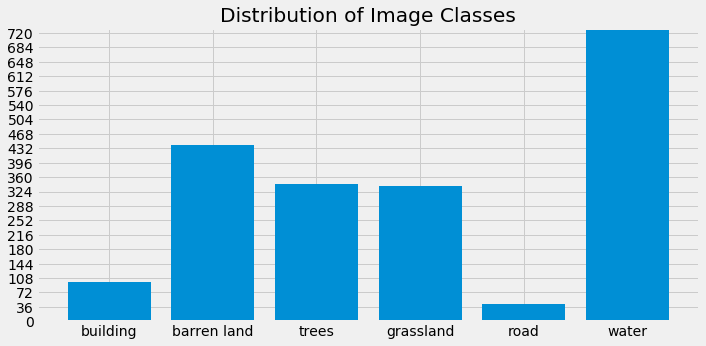

In [46]:
N = len(classes_ordered)
labels = ['building', 'barren land', 'trees', 'grassland', 'road', 'water']
data = counts_ordered
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,5))
tickLocations = np.arange(N)
ax.bar(tickLocations, data)
ax.set_xticks(ticks=tickLocations)
ax.set_xticklabels(labels)
ax.set_yticks(range(y_max)[0::y_interval])
ax.set_ylim((0,y_max))
ax.set_title("Distribution of Image Classes")
fig.tight_layout(pad=1)

In [47]:
def sort_save_x(x_array, class_list):
    '''
    Saves 28x28x4 images into corresponding classification folders
    '''
b = 0
bl = 0
t = 0
g = 0
r = 0
w = 0

for i in range(len(class_list)):

    data = x_train_play[:,:,0:3,i]
    img = Image.fromarray(data,'RGB')
   
    if class_list[i] == 0:
        img.save("../data/x_train_play/0_building/building{}.png".format(b))
        b +=1
    elif class_list[i] == 1:
        img.save("../data/x_train_play/1_barren_land/barren{}.png".format(bl))
        bl+=1
    elif class_list[i] == 2:
        img.save("../data/x_train_play/2_tree/tree{}.png".format(t))
        t+=1
    elif class_list[i] == 3:
        img.save("../data/x_train_play/3_grassland/grassland{}.png".format(g))
        g+=1
    elif class_list[i] == 4:
        img.save("../data/x_train_play/4_road/road{}.png".format(r))
        r+=1
    else:
        img.save("../data/x_train_play/5_water/water{}.png".format(w))
        w+=1
    
#     data = train_x_play[:,:,:,i]
#     img = Image.fromarray(data, 'RGBA')
#     img.save("../data/train_x/img{}.png".format(i))
            


In [48]:
for i in range(6):
    building = io.imread('../data/x_train_play/0_building/building{}.png'.format(i))
    barren = io.imread('../data/x_train_play/1_barren_land/barren{}.png'.format(i))
    tree = io.imread('../data/x_train_play/2_tree/tree{}.png'.format(i))
    grass = io.imread('../data/x_train_play/3_grassland/grassland{}.png'.format(i))
    road = io.imread('../data/x_train_play/4_road/road{}.png'.format(i))
    water = io.imread('../data/x_train_play/5_water/water{}.png'.format(i))

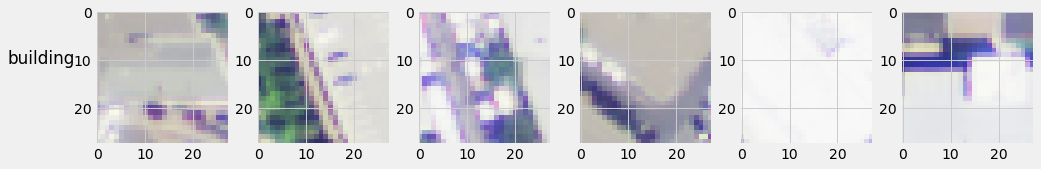

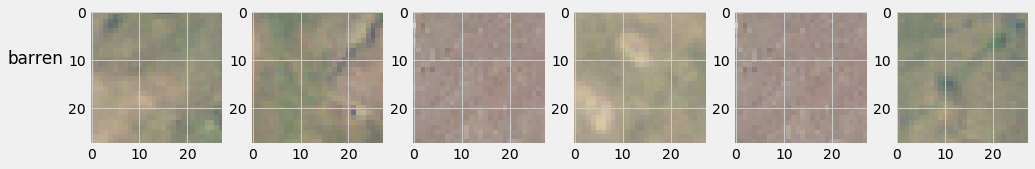

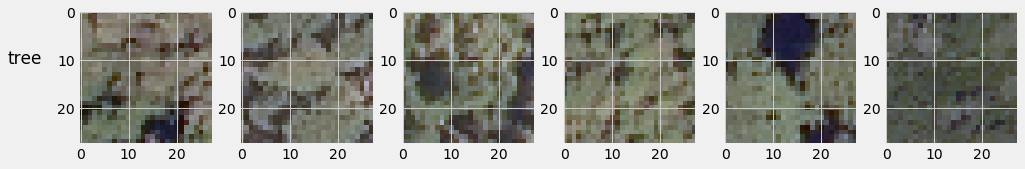

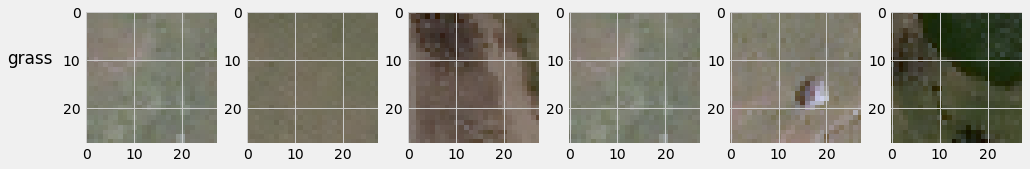

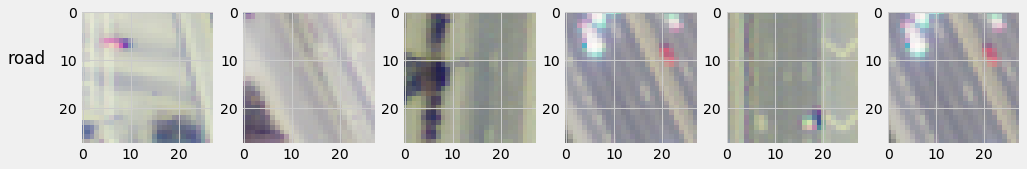

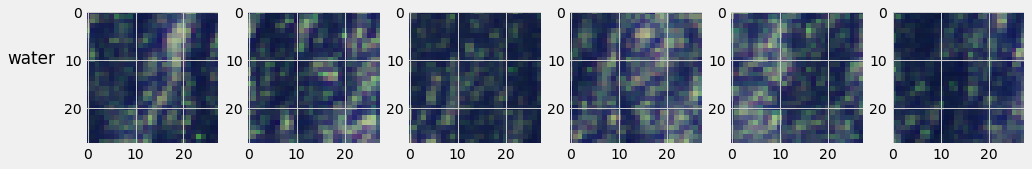

In [49]:
# plot 6 images from each class for demonstration

cols = [0, 1, 2, 3, 4, 5]

fig, ax = plt.subplots(1,6,figsize=(15,15))
for i in cols: 
    plt.grid(b=None, which='both')
    building = io.imread('../data/x_train_play/0_building/building{}.png'.format(np.random.randint(0,20)))
    ax[i].imshow(building)
    fig.suptitle('building',x=0.03, y=.5)


fig, ax = plt.subplots(1,6,figsize=(15,15))
for i in cols: 
    barren = io.imread('../data/x_train_play/1_barren_land/barren{}.png'.format(np.random.randint(0,20)))
    ax[i].imshow(barren)
    fig.suptitle('barren',x=0.03, y=.5)

fig, ax = plt.subplots(1,6,figsize=(15,15))
for i in cols: 
    tree = io.imread('../data/x_train_play/2_tree/tree{}.png'.format(np.random.randint(0,20)))
    ax[i].imshow(tree)
    fig.suptitle('tree',x=0.03, y=.5)

fig, ax = plt.subplots(1,6,figsize=(15,15))
for i in cols: 
    grass = io.imread('../data/x_train_play/3_grassland/grassland{}.png'.format(np.random.randint(0,20)))
    ax[i].imshow(grass)
    fig.suptitle('grass',x=0.03, y=.5)

fig, ax = plt.subplots(1,6,figsize=(15,15))
for i in cols: 
    road = io.imread('../data/x_train_play/4_road/road{}.png'.format(np.random.randint(0,20)))
    ax[i].imshow(road)
    fig.suptitle('road',x=0.03, y=.5)

fig, ax = plt.subplots(1,6,figsize=(15,15))
for i in cols: 
    water = io.imread('../data/x_train_play/5_water/water{}.png'.format(np.random.randint(0,20)))
    ax[i].imshow(water)
    fig.suptitle('water',x=0.03, y=.5)
    
#     for i2 in cols:
#         building = io.imread('../data/x_train_play/0_building/building{}.png'.format(i2))
#         barren = io.imread('../data/x_train_play/1_barren_land/barren{}.png'.format(i2))
#         tree = io.imread('../data/x_train_play/2_tree/tree{}.png'.format(i2))
#         grass = io.imread('../data/x_train_play/3_grassland/grassland{}.png'.format(i2))
#         road = io.imread('../data/x_train_play/4_road/road{}.png'.format(i2))
#         water = io.imread('../data/x_train_play/5_water/water{}.png'.format(i2))
        
# ax[a,b].imshow(building{}.format(b))
# ax[0,1].imshow(building{}.format(b))
# ax[0,1].set_title('Nobody???')
# ax[0,1].imshow(small_female)
# ax[1,0].set_title('Forest')
# ax[1,0].imshow(small_forest)
# ax[1,1].set_title('Beach')
# ax[1,1].imshow(small_beach)

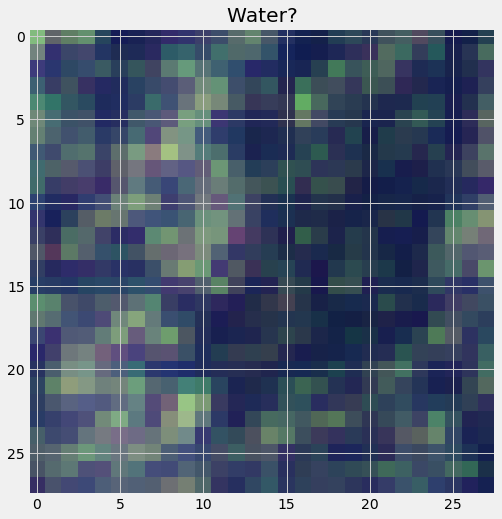

In [50]:
water = io.imread('../data/x_train_play/5_water/water4.png')
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.set_title('Water?')
ax.imshow(water)

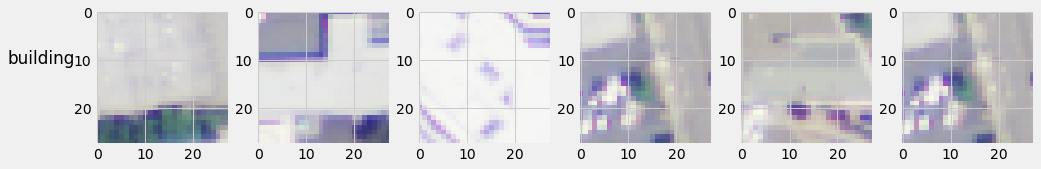

In [51]:
cols = [0, 1, 2, 3, 4, 5]
folder = 'x_train_play'

fig, ax = plt.subplots(1,6,figsize=(15,15))
for i in cols: 
    plt.grid(b=None, which='both')
    building = io.imread('../data/{}/0_building/building{}.png'.format(folder,np.random.randint(0,20)))
    ax[i].imshow(building)
    fig.suptitle('building',x=0.03, y=.5)